## Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset

In [3]:
data=pd.read_csv("/content/drive/MyDrive/CSE4214/Project/diabetes-dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Data visualization

In [4]:
data.shape

(2000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'].value_counts()


0    1316
1     684
Name: Outcome, dtype: int64

Non-Diabetic=0

Diabetic=1

In [8]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


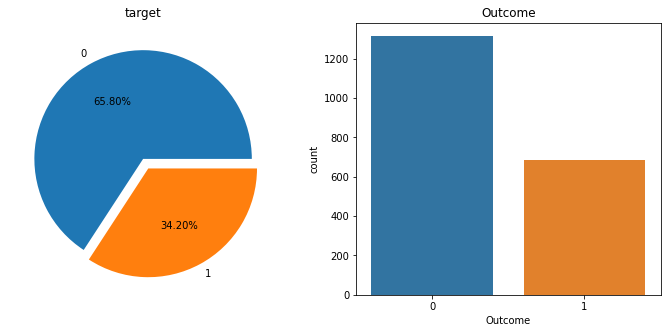

In [9]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(12,5))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=False)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

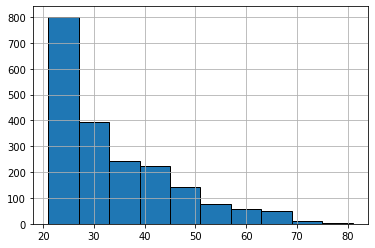

In [11]:
# The histagram of the Age variable was reached.
data["Age"].hist(edgecolor = "black");

In [12]:
print("Max Age: " + str(data["Age"].max()) + " Min Age: " + str(data["Age"].min()))

Max Age: 81 Min Age: 21


## Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

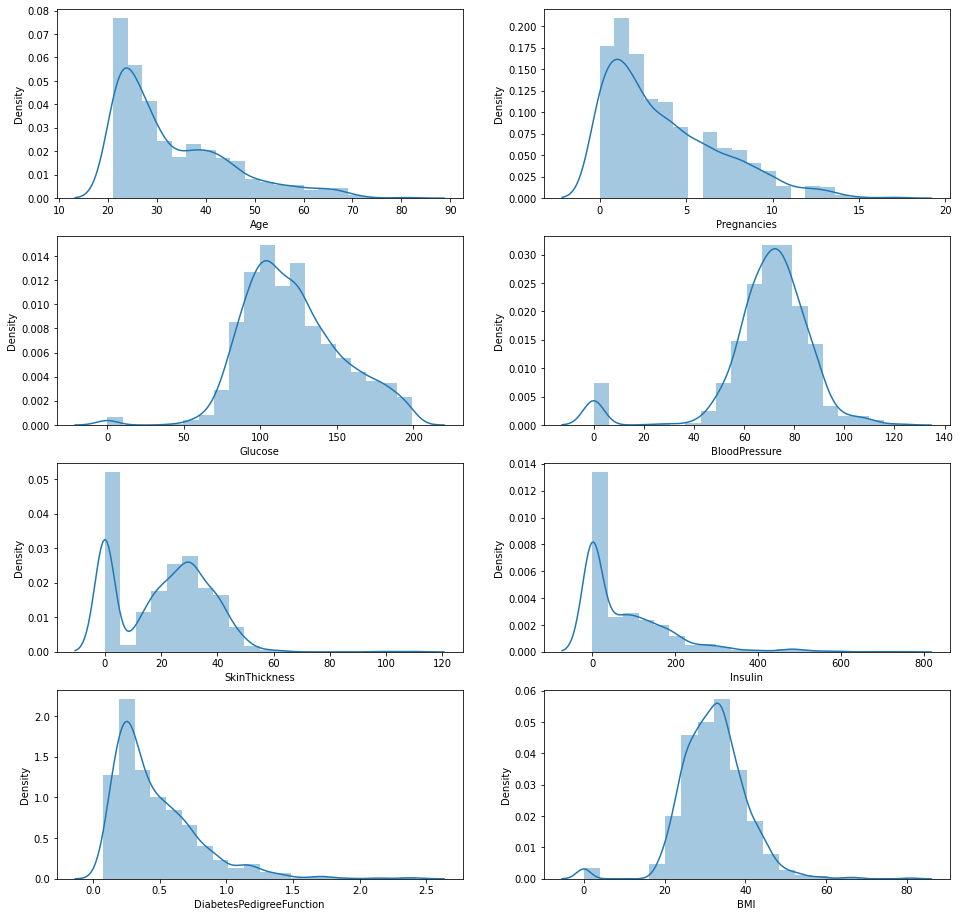

In [13]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1])

## Data preprocessing

In [14]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [16]:
# Now, we can look at where are missing values
data.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

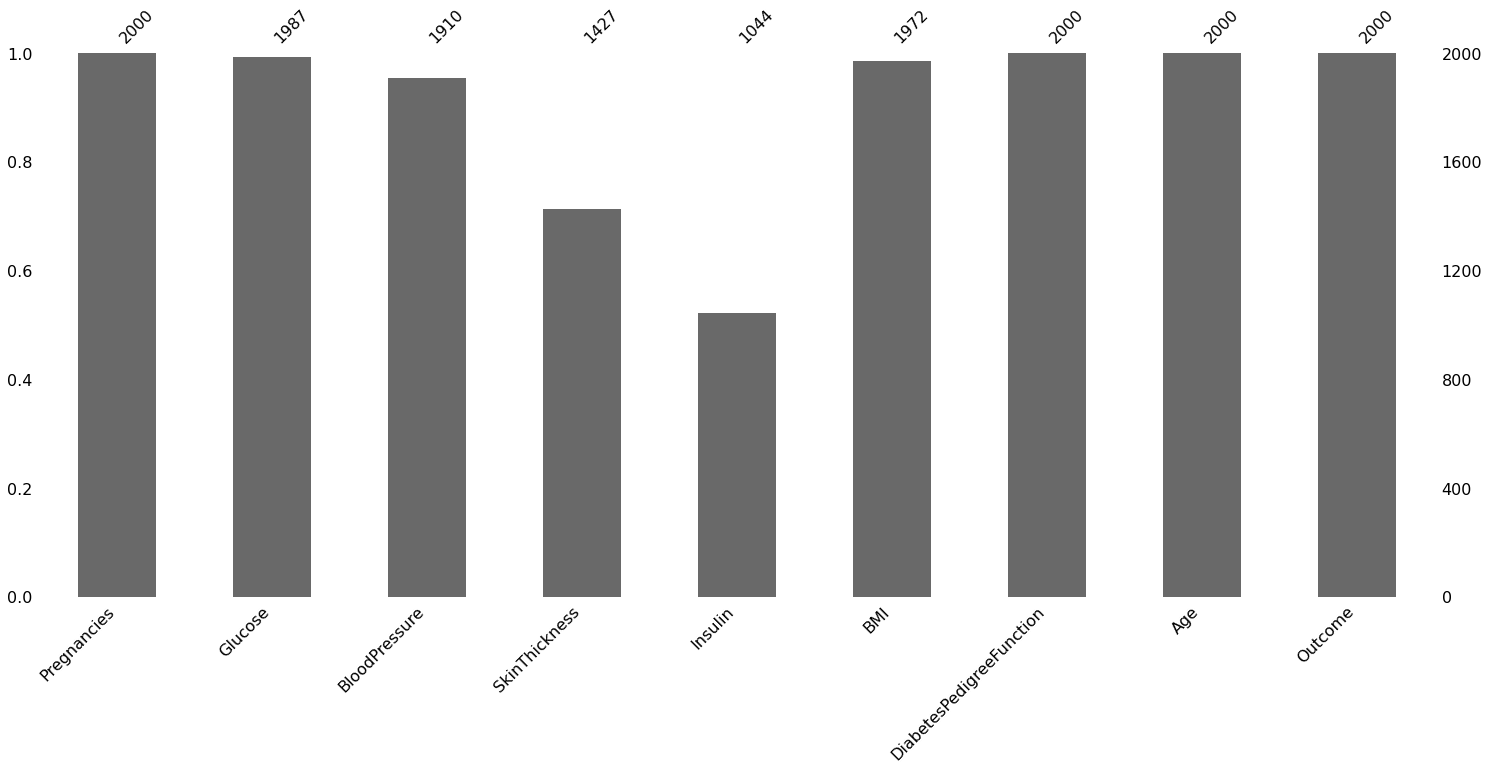

In [17]:
# visualized using the missingno library for the visualization of missing observations
import missingno as msno
msno.bar(data);

In [18]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [19]:
# The values to be given for incomplete observations are given the median value of people who are not diabetic and the median values of people who are diabetic.
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]


In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [21]:
# Missing values were filled.
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123833,0.199256,0.091586,0.055992,0.013573,-0.025453,0.539457,0.224437
Glucose,0.123833,1.000000,0.206593,0.239427,0.474283,0.237941,0.125344,0.262137,0.491359
BloodPressure,0.199256,0.206593,1.000000,0.207156,0.070774,0.263936,0.013178,0.324042,0.183879
SkinThickness,0.091586,0.239427,0.207156,1.000000,0.217563,0.538873,0.099152,0.131675,0.279449
Insulin,0.055992,0.474283,0.070774,0.217563,1.000000,0.257043,0.143990,0.078833,0.364111
BMI,0.013573,0.237941,0.263936,0.538873,0.257043,1.000000,0.141430,0.020003,0.285296
DiabetesPedigreeFunction,-0.025453,0.125344,0.013178,0.099152,0.143990,0.141430,1.000000,0.026569,0.155459
Age,0.539457,0.262137,0.324042,0.131675,0.078833,0.020003,0.026569,1.000000,0.236509
Outcome,0.224437,0.491359,0.183879,0.279449,0.364111,0.285296,0.155459,0.236509,1.000000


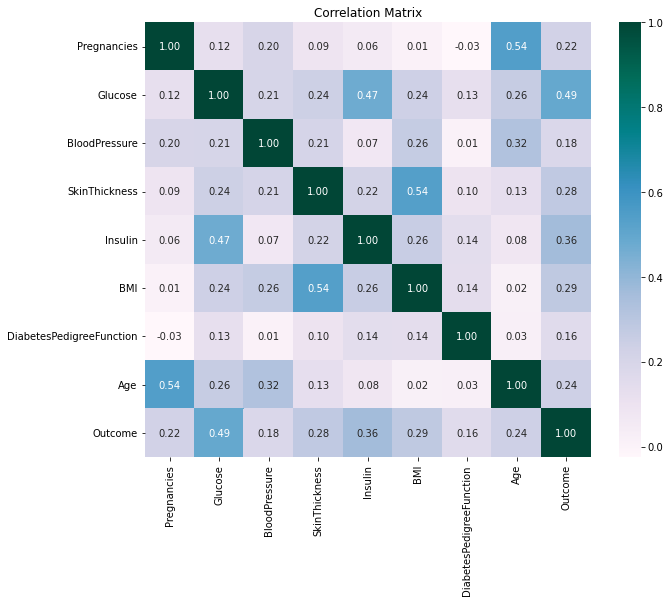

In [23]:
corr = data.corr()
#sns.heatmap(corr,annot=True)
f, ax = plt.subplots(figsize= [10,8])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "PuBuGn" )
ax.set_title("Correlation Matrix", fontsize=12)
plt.show()

## Box plot for outlier visualization

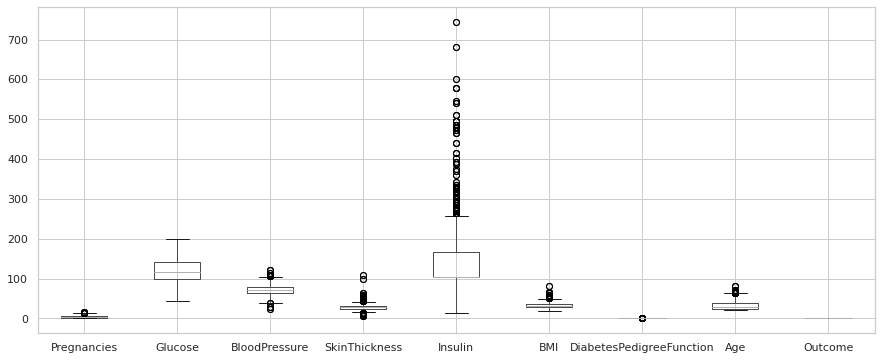

In [24]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

##Pairplot

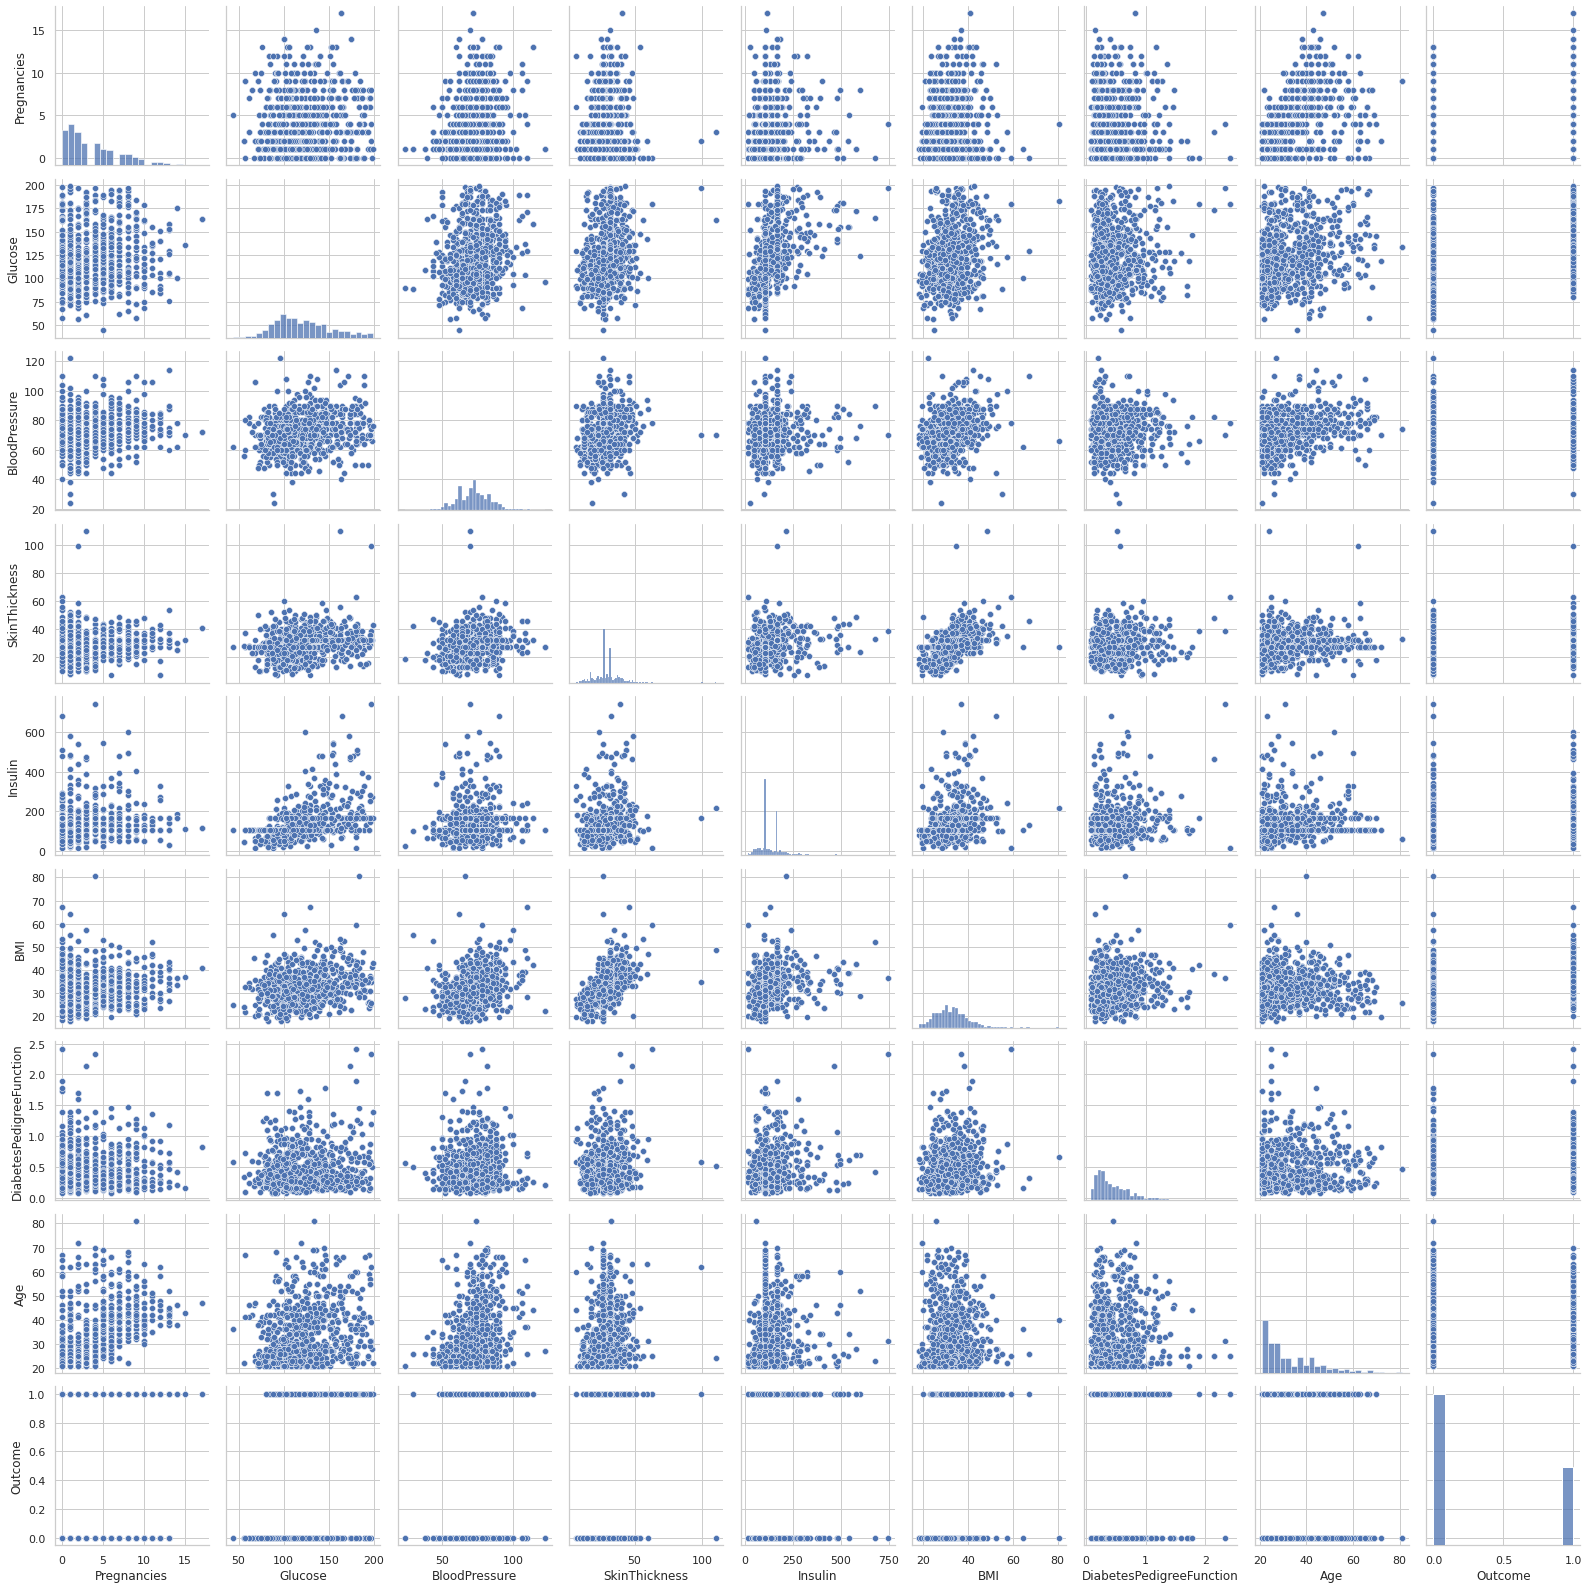

In [ ]:
sns.pairplot(data)

##Feature selection

In [25]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']
print(X)
print(Y)

      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0               2    138.0           62.0  ...  33.6                     0.127   47
1               0     84.0           82.0  ...  38.2                     0.233   23
2               0    145.0           75.0  ...  44.2                     0.630   31
3               0    135.0           68.0  ...  42.3                     0.365   24
4               1    139.0           62.0  ...  40.7                     0.536   21
...           ...      ...            ...  ...   ...                       ...  ...
1995            2     75.0           64.0  ...  29.7                     0.370   33
1996            8    179.0           72.0  ...  32.7                     0.719   36
1997            6     85.0           78.0  ...  31.2                     0.382   42
1998            0    129.0          110.0  ...  67.1                     0.319   26
1999            2     81.0           72.0  ...  30.1                     0.5

##Data Standardization

In [26]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.5153943   0.52428147 -0.86911072 ...  0.13562535 -1.06324616
   1.18042417]
 [-1.12049474 -1.24295944  0.80338177 ...  0.77513803 -0.7355513
  -0.85632626]
 [-1.12049474  0.75336825  0.2180094  ...  1.60928502  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.21023275  0.46888327 ... -0.19803344 -0.27492362
   0.75610116]
 [-1.12049474  0.22974132  3.14487126 ...  4.792946   -0.46968566
  -0.60173245]
 [-0.5153943  -1.34113949 -0.03286448 ... -0.35096039  0.23516743
  -0.68659705]]


In [28]:
X = standardized_data
Y = data['Outcome']

In [29]:
print(X)
print(Y)

[[-0.5153943   0.52428147 -0.86911072 ...  0.13562535 -1.06324616
   1.18042417]
 [-1.12049474 -1.24295944  0.80338177 ...  0.77513803 -0.7355513
  -0.85632626]
 [-1.12049474  0.75336825  0.2180094  ...  1.60928502  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.21023275  0.46888327 ... -0.19803344 -0.27492362
   0.75610116]
 [-1.12049474  0.22974132  3.14487126 ...  4.792946   -0.46968566
  -0.60173245]
 [-0.5153943  -1.34113949 -0.03286448 ... -0.35096039  0.23516743
  -0.68659705]]
0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


## Feature Importance

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07964773 0.20073557 0.0683398  0.12009107 0.2497459  0.09957222
 0.07929783 0.10256989]


## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 8) (1600, 8) (400, 8)


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7725


In [34]:
y_pred=np.round(model.predict(X_test))

In [36]:
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(Y_test,Y_pred))

F1-Score: 0.6255144032921811


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score:",precision_score(Y_test,Y_pred))

Precision Score: 0.7264150943396226


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(Y_test,Y_pred))

Recall Score: 0.5968992248062015


## Confusion Matrix

In [ ]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[242  29]
 [ 52  77]]


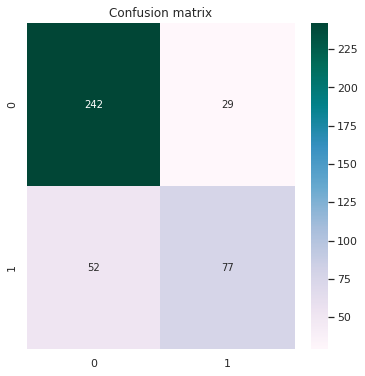

In [ ]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(confusion_mat,columns=[0,1],index=[0,1])
plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='PuBuGn',)
plt.title(f"Confusion matrix")
plt.show()

## SVM

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)
pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.8975


In [ ]:
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(Y_test,Y_pred))

F1-Score: 0.6553191489361702


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score:",precision_score(Y_test,Y_pred))

Precision Score: 0.6936936936936937


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(Y_test,Y_pred))

Recall Score: 0.5310344827586206


## Decision *Tree*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy',random_state=1)
model2.fit(X_train,Y_train)
y_pred = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9875


In [ ]:
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(Y_test,Y_pred))

F1-Score: 0.6553191489361702


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score:",precision_score(Y_test,Y_pred))

Precision Score: 0.6936936936936937


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(Y_test,Y_pred))

Recall Score: 0.5310344827586206


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,Y_train)
y_pred = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.87


In [ ]:
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(Y_test,Y_pred))

F1-Score: 0.6015625


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score:",precision_score(Y_test,Y_pred))

Precision Score: 0.6936936936936937


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(Y_test,Y_pred))

Recall Score: 0.5968992248062015


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.985


In [ ]:
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(Y_test,Y_pred))

F1-Score: 0.6553191489361702


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score:",precision_score(Y_test,Y_pred))

Precision Score: 0.7264150943396226


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(Y_test,Y_pred))

Recall Score: 0.5968992248062015


## Results

In [ ]:
from sklearn.metrics import classification_report
classify_report = classification_report(Y_test,Y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       276
           1       0.28      0.24      0.26       124

    accuracy                           0.57       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.56      0.57      0.57       400



In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM','Decision Tree' , 'KNN','Random Forest'],
    'Accuracy Score': [0.7975,0.858,0.99,0.87,0.985]})

result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Accuracy Score')
print(result_df)

                              Model
Accuracy Score                     
0.9900                Decision Tree
0.9850                Random Forest
0.8700                          KNN
0.8580                          SVM
0.7975          Logistic Regression


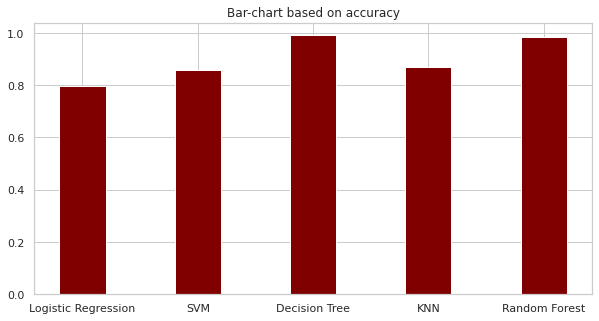

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (10, 5))

x = np.array(['Logistic Regression', 'SVM','Decision Tree' , 'KNN','Random Forest'])
y = np.array([0.7975,0.858,0.99,0.87,0.985])

plt.bar(x,y, color ='maroon',
        width = 0.4)

plt.title("Bar-chart based on accuracy")

plt.show()

**Hence we will use Decision Tree algorithm for training our model.**







## Making a Predictive System

In [ ]:
input_data = (2,138,62,35,167,33.6,0.127,47)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model2.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.5153943   0.52428147 -0.86911072  0.62796305  0.30717957  0.13562535
  -1.06324616  1.18042417]]
[1]
The person is diabetic
